<a href="https://colab.research.google.com/github/NaDaGyeong/ml-for-AI/blob/main/w6/w6_ch4_10_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_04

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_04


# Task 1

In [3]:
import pandas as pd
import numpy as np

In [4]:
weather = pd.read_csv('data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [5]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


## Arithmetic and statistics

In [6]:
fb.assign(
    abs_z_score_volume = lambda x: \
    x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


`rank()` & `pct_change()`

In [7]:
fb.assign(
    volume_pct_change=fb.volume.pct_change(),
    pct_change_rank = lambda x:\
    x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [8]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [9]:
# Facebook's stock price never had a low above $215
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [10]:
# Facebook's OHLC (open, high, low, and close) prices all had at least one day they were at $215 or less
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

## Binning

In [11]:
(fb.volume.value_counts() > 1).sum()

0

`pd.cut()`

In [12]:
volumne_binned = pd.cut(fb.volume, bins=3, labels=['low','med','high'])
volumne_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [13]:
import sys
sys.path.append('/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/visual-aids/')

from visual_aids import stats_viz

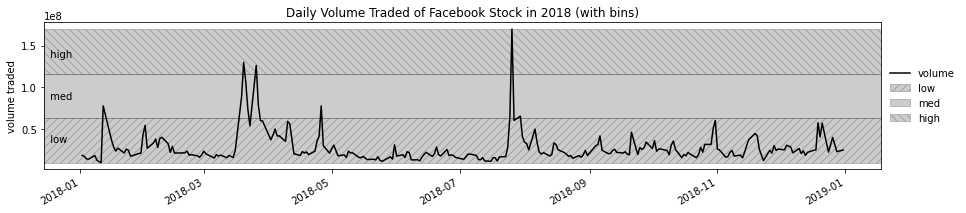

In [14]:
from visual_aids.misc_viz import low_med_high_bins_viz

low_med_high_bins_viz(
    fb, 'volume', ylabel='volume traded',
    title='Daily Volume Traded of Facebook Stock in 2018 (with bins)'
)

`qcut()`

In [15]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1','q2','q3','q4'])
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

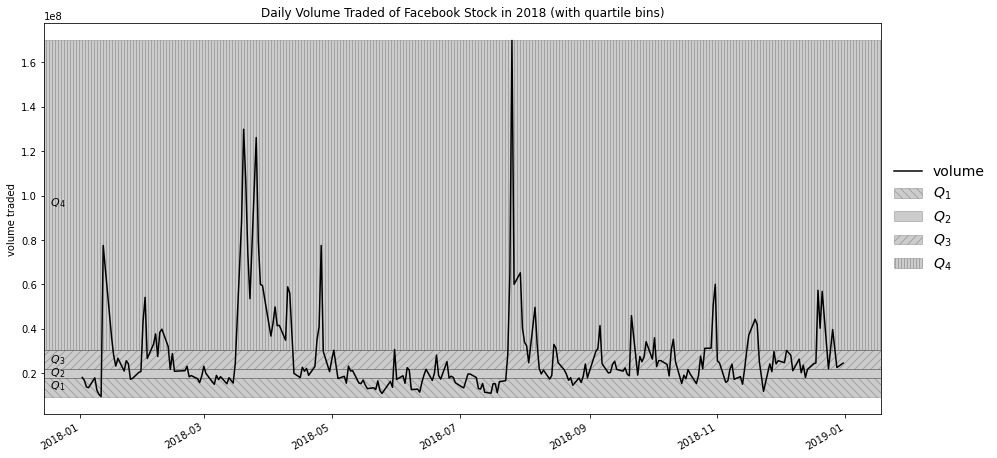

In [16]:
from visual_aids.misc_viz import quartile_bins_viz

quartile_bins_viz(
    fb, 'volume', ylabel='volume traded', 
    title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)'
)

## Applying Functions

`apply()`

In [17]:
weather \
.query('station == "GHCND:USW00094728"')

,date,datatype,station,attributes,value
189,2018-01-01,AWND,GHCND:USW00094728,",,W,",3.5
190,2018-01-01,PRCP,GHCND:USW00094728,",,W,2400",0.0
191,2018-01-01,SNOW,GHCND:USW00094728,",,W,",0.0
192,2018-01-01,SNWD,GHCND:USW00094728,"T,,W,2400",0.0
193,2018-01-01,TMAX,GHCND:USW00094728,",,W,2400",-7.1
...,...,...,...,...,...
78744,2018-12-31,SNOW,GHCND:USW00094728,",,W,",0.0
78745,2018-12-31,SNWD,GHCND:USW00094728,",,W,2400",0.0
78746,2018-12-31,TMAX,GHCND:USW00094728,",,W,2400",8.9
78747,2018-12-31,TMIN,GHCND:USW00094728,",,W,2400",2.2


In [18]:
# long format을 pivot으로 wide로 바꿈
central_park_weather = weather \
.query('station == "GHCND:USW00094728"')\
.pivot(index='date', columns='datatype', values='value')

In [19]:
oct_weather_z_scores = central_park_weather\
.loc['2018-10', ['TMIN','TMAX','PRCP']]\
.apply(lambda x: x.sub(x.mean()).div(x.std()))

oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,4.655774e-17,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [20]:
oct_weather_z_scores.query('PRCP > 3').PRCP

date
2018-10-27    3.936167
Name: PRCP, dtype: float64

In [21]:
central_park_weather.loc['2018-10', 'PRCP'].describe()

count    31.000000
mean      2.941935
std       7.458542
min       0.000000
25%       0.000000
50%       0.000000
75%       1.150000
max      32.300000
Name: PRCP, dtype: float64

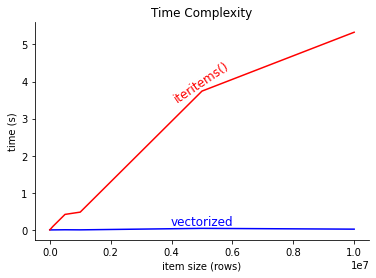

In [22]:
import time

import numpy as np
import pandas as pd

np.random.seed(0)

vectorized_results = {}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
    # set of numbers to use
    test = pd.Series(np.random.uniform(size=size))
    
    # time the vectorized operation
    start = time.time()
    x = test + 10
    end = time.time()
    vectorized_results[size] = end - start
    
    # time the operation with `iteritems()`
    start = time.time()
    x = []
    for i, v in test.iteritems():
        x.append(v + 10)
    x = pd.Series(x)
    end = time.time()
    iteritems_results[size] = end - start

results = pd.DataFrame(
    [pd.Series(vectorized_results, name='vectorized'), pd.Series(iteritems_results, name='iteritems')]
).T    

# plotting
ax = results.plot(title='Time Complexity', color=['blue', 'red'], legend=False)

# formatting
ax.set(xlabel='item size (rows)', ylabel='time (s)')
ax.text(0.5e7, iteritems_results[0.5e7] * .9, 'iteritems()', rotation=34, color='red', fontsize=12, ha='center', va='bottom')
ax.text(0.5e7, vectorized_results[0.5e7], 'vectorized', color='blue', fontsize=12, ha='center', va='bottom')
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

## Window Calculations

`rolling()`

In [23]:
central_park_weather.loc['2018-10'].assign(
    rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [24]:
central_park_weather.loc['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000
2018-10-06,0.833333,0.333333,0.0,0.0,22.033333,16.300000
2018-10-07,1.066667,0.000000,0.0,0.0,22.600000,17.400000


`agg()`

In [25]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
    {'TMAX':'max', 'TMIN':'min','AWND':'mean','PRCP':'sum'}
).join( # join with original data for comparison
    central_park_weather[['TMAX','TMIN','AWND','PRCP']],
    lsuffix='_rolling'
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


In [26]:
central_park_weather.loc['2018-06'].assign(
    TOTAL_PRCP=lambda x: x.PRCP.cumsum(),
    AVG_PRCP=lambda x: x.PRCP.expanding().mean()
).head(10)[['PRCP', 'TOTAL_PRCP','AVG_PRCP']].T

date,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10
datatype,,,,,,,,,,
PRCP,6.9,2.00,6.4,4.10,0.00,0.000000,0.000000,0.000,0.000000,0.30
TOTAL_PRCP,6.9,8.90,15.3,19.40,19.40,19.400000,19.400000,19.400,19.400000,19.70
AVG_PRCP,6.9,4.45,5.1,4.85,3.88,3.233333,2.771429,2.425,2.155556,1.97


In [27]:
central_park_weather.loc['2018-06'].assign(
    TOTAL_PRCP=lambda x: x.PRCP.expanding().sum(),
    AVG_PRCP=lambda x: x.PRCP.expanding().mean()
).head(10)[['PRCP', 'TOTAL_PRCP','AVG_PRCP']].T

date,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10
datatype,,,,,,,,,,
PRCP,6.9,2.00,6.4,4.10,0.00,0.000000,0.000000,0.000,0.000000,0.30
TOTAL_PRCP,6.9,8.90,15.3,19.40,19.40,19.400000,19.400000,19.400,19.400000,19.70
AVG_PRCP,6.9,4.45,5.1,4.85,3.88,3.233333,2.771429,2.425,2.155556,1.97


In [28]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {'TMAX':np.max, 'TMIN':np.min, 'AWND':np.mean, 'PRCP':np.sum}
).join(
    central_park_weather[['TMAX','TMIN','AWND','PRCP']],
    lsuffix='_expanding'
).sort_index(axis=1)

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.825000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,0.980000,0.0,18.5,21.7,25.0,15.6,15.6
2018-10-06,0.5,0.900000,0.0,18.5,20.0,25.0,17.2,15.6
2018-10-07,1.1,0.928571,0.0,18.5,26.1,26.1,19.4,15.6


`ewm()`

In [29]:
central_park_weather.assign(
    AVG=lambda x: x.TMAX.rolling('30D').mean(),
    EWMA = lambda x: x.TMAX.ewm(span=30).mean()
).loc['2018-09-29':'2018-10-08', ['TMAX','EWMA','AVG']]

datatype,TMAX,EWMA,AVG
date,,,
2018-09-29,22.2,24.410887,24.723333
2018-09-30,21.1,24.197281,24.573333
2018-10-01,24.4,24.210360,24.533333
2018-10-02,25.0,24.261304,24.460000
2018-10-03,23.3,24.199285,24.163333
2018-10-04,24.4,24.212234,23.866667
2018-10-05,21.7,24.050154,23.533333
2018-10-06,20.0,23.788854,23.070000
2018-10-07,26.1,23.937960,23.143333


## Pipes

In [30]:
def get_info(df):
    return '%d rows, %d columns and max closing Z-score was %d' % (*df.shape, df.close.max())

get_info(fb.loc['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))\
    == fb.loc['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)

True

In [31]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(fb.rolling('20D').mean())

True

In [32]:
pd.DataFrame.rolling(fb, '20D').mean().equals(fb.rolling('20D').mean())

True

In [33]:
from window_calc import window_calc

In [34]:
window_calc(fb, pd.DataFrame.expanding, np.median).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


In [35]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


In [36]:
window_calc(
    central_park_weather.loc['2018-10'], 
    pd.DataFrame.rolling, 
    {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'},
    '3D'
).head()

datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0


# Aggregating data with pandas and numpy

In [37]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low','med','high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [38]:
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [39]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Summarizing DataFrames

In [40]:
fb.agg({
    'open': np.mean,
    'high': np.max,
    'low' : np.min,
    'close' : np.mean,
    'volume' : np.sum
})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [41]:
fb.agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low' : ['min', 'max'],
    'close' : 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


In [42]:
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW', 'PRCP']]\
    .sum()

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

`'sum'` to `agg()`

In [43]:
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW', 'PRCP']]\
    .agg('sum')

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

# Task2

In [123]:
dp=weather.query('datatype=="PRCP"').groupby(level=0).mean()
dp

,value
date,
2018-01-01,0.00
2018-01-02,0.00
2018-01-03,0.00
2018-01-04,4.92
2018-01-05,12.30
...,...
2018-12-27,0.00
2018-12-28,10.46
2018-12-29,18.66


In [136]:
# Solution
dp.groupby(pd.Grouper(freq='Q')).sum()

,value
date,
2018-03-31,364.89
2018-06-30,334.89
2018-09-30,546.52
2018-12-31,473.97


In [126]:
# Find which quarter had the most rain from the daily precipitation data
weather.query('datatype == "PRCP"')\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='Q')).sum().value.nlargest()

date
2018-09-30   546.52
2018-12-31   473.97
2018-03-31   364.89
2018-06-30   334.89
Name: value, dtype: float64

In [135]:
# Assign 'quarterly total precipitation' and 'number of days in a month' variables to daily precipitation data
weather.assign(
    quarterly_total_prcp=dp.groupby(pd.Grouper(freq='Q')).transform(np.sum),
    dqys_in_the_month=dp.groupby(pd.Grouper(freq='M')).value.transform('count')
).head()

,datatype,station,value,station_name,quarterly_total_prcp,dqys_in_the_month
date,,,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US",364.89,31
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US",364.89,31
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US",364.89,31
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US",364.89,31
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US",364.89,31


In [129]:
# Assign 'quarterly total precipitation' and 'number of days in a month' variables to daily precipitation data
weather\
    .query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .assign(
        quarterly_total_prcp=lambda x: \
        x.groupby(pd.Grouper(freq='Q')).transform(np.sum),
        total_day_count_in_month = lambda x: \
        x.groupby(pd.Grouper(freq='M')).prcp.transform('count')
    )

,prcp,quarterly_total_prcp,total_day_count_in_month
date,,,
2018-01-01,0.00,364.89,31
2018-01-02,0.00,364.89,31
2018-01-03,0.00,364.89,31
2018-01-04,4.92,364.89,31
2018-01-05,12.30,364.89,31
...,...,...,...
2018-12-27,0.00,473.97,31
2018-12-28,10.46,473.97,31
2018-12-29,18.66,473.97,31


In [138]:
# Solution
dp.assign(
    total_prcp_in_q=lambda x: x.groupby(pd.Grouper(freq='Q')).transform(np.sum),
    total_day_count_in_q=lambda x: x.groupby(pd.Grouper(freq='Q')).value.transform('count')
)

,value,total_prcp_in_q,total_day_count_in_q
date,,,
2018-01-01,0.00,364.89,90
2018-01-02,0.00,364.89,90
2018-01-03,0.00,364.89,90
2018-01-04,4.92,364.89,90
2018-01-05,12.30,364.89,90
...,...,...,...
2018-12-27,0.00,473.97,92
2018-12-28,10.46,473.97,92
2018-12-29,18.66,473.97,92


In [134]:
# calculate rolling 3days mean precipitation
weather.rolling('3D').mean().head(7).iloc[:,:6]

,value
date,
2018-01-01,0.00
2018-01-01,0.00
2018-01-01,0.00
2018-01-01,0.00
2018-01-01,0.00
2018-01-01,0.00
2018-01-01,0.00


## Using `groupby()`

In [44]:
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [45]:
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [46]:
fb.groupby('trading_volume')['close'].agg(['min','max','mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


In [47]:
fb_agg = fb.groupby('trading_volume').agg({
    'open' : 'mean',
    'high' : ['min', 'max'],
    'low' : ['min', 'max'],
    'close' : 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [48]:
fb_agg.columns # multiindex

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [49]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [50]:
weather.loc['2018-10'].query('datatype == "PRCP"')\
.groupby(level=0).mean().head().squeeze() # squeeze()는 series로 바꿔줌

date
2018-10-01    0.01
2018-10-02    2.23
2018-10-03   19.69
2018-10-04    0.32
2018-10-05    0.97
Name: value, dtype: float64

In [51]:
weather.loc['2018-10'].query('datatype == "PRCP"')\
.groupby(level=0).mean().head()

,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


`Grouper`

In [52]:
weather.query('datatype == "PRCP"').groupby(
    ['station_name', pd.Grouper(freq='Q')]
).sum()

value
station_name                  date             
ALBERTSON 0.2 SSE, NY US      2018-03-31 359.40
                              2018-06-30 279.90
                              2018-09-30 294.80
                              2018-12-31 405.10
AMITYVILLE 0.1 WSW, NY US     2018-03-31 314.90
...                                         ...
WOODBRIDGE TWP 1.1 NNE, NJ US 2018-12-31 480.70
WOODBRIDGE TWP 3.0 NNW, NJ US 2018-03-31 342.70
                              2018-06-30 372.90
                              2018-09-30 440.10
                              2018-12-31 401.50

[397 rows x 1 columns]

In [53]:
weather.query('datatype == "PRCP"').groupby(
    ['station_name', pd.Grouper(freq='Q')]
).sum().unstack().sample(5, random_state=1)

value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US          279.90     216.80     472.50     277.20
STATEN ISLAND 1.4 SE, NY US     379.40     295.30     438.80     409.90
SYOSSET 2.0 SSW, NY US          323.50     263.30     355.50     459.90
STAMFORD 4.2 S, CT US           338.00     272.10     424.70     390.00
WAYNE TWP 0.8 SSW, NJ US        246.20     295.30     620.90     422.00

`filter()`

In [54]:
weather.groupby('station_name').filter( # station names with "NY US" in them
    lambda x: x.name.endswith('NY US')
).query('datatype == "SNOW"').groupby('station_name').sum().squeeze() # aggregate and make a series (squeeze)

station_name
ALBERTSON 0.2 SSE, NY US           1087.00
AMITYVILLE 0.1 WSW, NY US           434.00
AMITYVILLE 0.6 NNE, NY US          1072.00
ARMONK 0.3 SE, NY US               1504.00
BROOKLYN 3.1 NW, NY US              305.00
CENTERPORT 0.9 SW, NY US            799.00
CENTERPORT, NY US                  1333.00
ELMSFORD 0.8 SSW, NY US             863.00
FLORAL PARK 0.4 W, NY US           1015.00
HICKSVILLE 1.3 ENE, NY US           716.00
JACKSON HEIGHTS 0.3 WSW, NY US      107.00
JFK INTERNATIONAL AIRPORT, NY US    855.00
LA GUARDIA AIRPORT, NY US           892.00
LOCUST VALLEY 0.3 E, NY US            0.00
LYNBROOK 0.3 NW, NY US              325.00
MASSAPEQUA 0.9 SSW, NY US            41.00
MIDDLE VILLAGE 0.5 SW, NY US       1249.00
NEW HYDE PARK 1.6 NE, NY US           0.00
NEW YORK 8.8 N, NY US                 0.00
NORTH WANTAGH 0.4 WSW, NY US        471.00
NY CITY CENTRAL PARK, NY US        1007.00
PLAINEDGE 0.4 WSW, NY US            610.00
PLAINVIEW 0.4 ENE, NY US           1360.0

In [55]:
weather.query('datatype == "PRCP"')\
.groupby(level=0).mean()

,value
date,
2018-01-01,0.00
2018-01-02,0.00
2018-01-03,0.00
2018-01-04,4.92
2018-01-05,12.30
...,...
2018-12-27,0.00
2018-12-28,10.46
2018-12-29,18.66


In [56]:
weather.query('datatype == "PRCP"')\
.groupby(level=0).mean()\
.groupby(pd.Grouper(freq='M')).sum()

,value
date,
2018-01-31,69.31
2018-02-28,158.11
2018-03-31,137.46
2018-04-30,140.57
2018-05-31,113.38
2018-06-30,80.94
2018-07-31,160.98
2018-08-31,192.45
2018-09-30,193.09


In [57]:
weather.query('datatype == "PRCP"')\
.groupby(level=0).mean()\
.groupby(pd.Grouper(freq='M')).sum().value.nlargest()

date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

`transform()`

In [58]:
weather.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(level=0).mean()

,prcp
date,
2018-01-01,0.00
2018-01-02,0.00
2018-01-03,0.00
2018-01-04,4.92
2018-01-05,12.30
...,...
2018-12-27,0.00
2018-12-28,10.46
2018-12-29,18.66


In [59]:
weather.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(level=0).mean()\
.groupby(pd.Grouper(freq='M')).sum()

,prcp
date,
2018-01-31,69.31
2018-02-28,158.11
2018-03-31,137.46
2018-04-30,140.57
2018-05-31,113.38
2018-06-30,80.94
2018-07-31,160.98
2018-08-31,192.45
2018-09-30,193.09


In [60]:
weather.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(level=0).mean()\
.groupby(pd.Grouper(freq='M'))\
.transform(np.sum)

,prcp
date,
2018-01-01,69.31
2018-01-02,69.31
2018-01-03,69.31
2018-01-04,69.31
2018-01-05,69.31
...,...
2018-12-27,157.75
2018-12-28,157.75
2018-12-29,157.75


In [61]:
weather.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(level=0).mean()\
.groupby(pd.Grouper(freq='M'))\
.transform(np.sum)['2018-01-28':'2018-02-03']

,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


In [62]:
weather\
.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(level=0).mean()\
.assign(
    total_prcp_in_month=lambda x: \
    x.groupby(pd.Grouper(freq='M')).transform(np.sum),
    pct_monthly_prcp = lambda x: \
    x.prcp.div(x.total_prcp_in_month)
)\
.nlargest(5, 'pct_monthly_prcp')

,prcp,total_prcp_in_month,pct_monthly_prcp
date,,,
2018-10-12,34.77,105.63,0.33
2018-01-13,21.66,69.31,0.31
2018-03-02,38.77,137.46,0.28
2018-04-16,39.34,140.57,0.28
2018-04-17,37.30,140.57,0.27


In [63]:
# count
weather\
.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(level=0).mean()\
.assign(
    total_prcp_in_month=lambda x: \
    x.groupby(pd.Grouper(freq='M')).transform(np.sum),
    total_day_count_in_month = lambda x: \
    x.groupby(pd.Grouper(freq='M')).prcp.transform('count'),
    pct_monthly_prcp = lambda x: \
    x.prcp.div(x.total_prcp_in_month)
)\
.nlargest(5, 'pct_monthly_prcp')

,prcp,total_prcp_in_month,total_day_count_in_month,pct_monthly_prcp
date,,,,
2018-10-12,34.77,105.63,31,0.33
2018-01-13,21.66,69.31,31,0.31
2018-03-02,38.77,137.46,31,0.28
2018-04-16,39.34,140.57,30,0.28
2018-04-17,37.30,140.57,30,0.27


In [64]:
fb[['open', 'high', 'low', 'close']]\
    .transform(lambda x: (x - x.mean()).div(x.std()))\
    .head()

,open,high,low,close
date,,,,
2018-01-02,0.32,0.41,0.41,0.50
2018-01-03,0.53,0.57,0.60,0.66
2018-01-04,0.68,0.65,0.74,0.64
2018-01-05,0.72,0.68,0.78,0.77
2018-01-08,0.80,0.79,0.85,0.84


## Pivot tables and crosstabs

`pivot_table()`

In [65]:
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [66]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [67]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
med,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


In [68]:
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [69]:
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"


In [70]:
weather.reset_index().pivot_table(
    index=['date','station','station_name'],
    columns='datatype',
    values='value',
    aggfunc='median'
).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`pd.crosstab()`

In [71]:
pd.crosstab(
    index=weather.station,
    columns=weather.datatype,
    colnames=['month']
)

month,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
station,,,,,,,,,,,,,,,,,,,,,
GHCND:US1CTFR0039,0,9,9,0,306,10,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GHCND:US1NJBG0003,0,2,2,0,242,108,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GHCND:US1NJBG0010,0,0,0,0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GHCND:US1NJBG0015,0,12,12,0,330,175,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GHCND:US1NJBG0017,0,6,6,0,332,187,37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GHCND:USW00054787,365,0,0,365,365,0,0,0,365,365,...,365,20,3,0,0,0,0,1,0,0
GHCND:USW00094728,281,0,0,0,365,365,365,0,365,365,...,281,176,10,25,0,0,1,61,0,0
GHCND:USW00094741,363,0,0,363,363,9,1,0,363,363,...,363,33,1,0,4,0,0,8,3,0


In [72]:
fb.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=251, freq=None)

In [73]:
fb.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=251)

In [74]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month']
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [75]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    normalize='columns'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,0.95,1.00,0.71,0.95,1.00,1.00,0.86,1.00,1.00,1.00,1.00,1.00
med,0.05,0.00,0.19,0.05,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00
high,0.00,0.00,0.10,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00


In [76]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    values=fb.close,
    aggfunc=np.mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


`margins`

In [77]:
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x>0).sum(),
    margins=True,
    margins_name='total observations of snow'
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7


# Working with Time Series Data

In [78]:
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [79]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.16,153.35,35338901,low
2018-10-12,156.73,156.89,151.30,153.74,25293492,low
2018-10-15,153.32,155.57,152.55,153.52,15433521,low


In [80]:
fb.loc['2018-q1'].equals(fb['2018-01':'2018-03'])

True

In [81]:
fb.first('1W') # one week

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low


In [82]:
fb.last('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [83]:
fb_reindexed = fb.reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))
fb_reindexed.first('1D').isna().squeeze().all()

True

In [84]:
fb_reindexed.loc['2018-Q1'].first_valid_index()

Timestamp('2018-01-02 00:00:00', freq='D')

In [85]:
fb_reindexed.loc['2018-Q1'].last_valid_index()

Timestamp('2018-03-29 00:00:00', freq='D')

In [86]:
fb_reindexed.asof('2018-03-31')

open                  155.15
high                  161.42
low                   154.14
close                 159.79
volume           59434293.00
trading_volume           low
Name: 2018-03-31 00:00:00, dtype: object

In [87]:
stock_data_per_minute = pd.read_csv(
    'data/fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True, 
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)

stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-20 09:31:00,182.61,182.61,182.61,182.61,468017.00
2019-05-20 09:32:00,182.75,182.75,182.75,182.75,97258.00
2019-05-20 09:33:00,182.95,182.95,182.95,182.95,43961.00
2019-05-20 09:34:00,183.06,183.06,183.06,183.06,79562.00


In [88]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first',
    'high': 'max', 
    'low': 'min', 
    'close': 'last', 
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [89]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.00
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.00
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.00
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.00


In [90]:
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.91,182.91,182.91,182.91,134569.00
2019-05-20 16:00:00,182.72,182.72,182.72,182.72,1113672.00
2019-05-21 15:59:00,184.84,184.84,184.84,184.84,61606.00
2019-05-21 16:00:00,184.82,184.82,184.82,184.82,801080.00
2019-05-22 15:59:00,185.29,185.29,185.29,185.29,96099.00
2019-05-22 16:00:00,185.32,185.32,185.32,185.32,1220993.00
2019-05-23 15:59:00,180.72,180.72,180.72,180.72,109648.00
2019-05-23 16:00:00,180.87,180.87,180.87,180.87,1329217.00
2019-05-24 15:59:00,181.07,181.07,181.07,181.07,52994.00


In [91]:
stock_data_per_minute.index.to_series().dt.normalize().head()

date
2019-05-20 09:30:00   2019-05-20
2019-05-20 09:31:00   2019-05-20
2019-05-20 09:32:00   2019-05-20
2019-05-20 09:33:00   2019-05-20
2019-05-20 09:34:00   2019-05-20
Name: date, dtype: datetime64[ns]

## Shifting for lagged data

In [92]:
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
)

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low,NaN,NaN,NaN
2018-01-03,181.88,184.78,181.33,184.67,16886563,low,181.42,0.46,0.46
2018-01-04,184.90,186.21,184.10,184.33,13880896,low,184.67,0.23,0.23
2018-01-05,185.59,186.90,184.93,186.85,13574535,low,184.33,1.26,1.26
2018-01-08,187.20,188.90,186.33,188.28,17994726,low,186.85,0.35,0.35
...,...,...,...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.02,124.06,22066002,low,124.95,-1.85,1.85
2018-12-26,126.00,134.24,125.89,134.18,39723370,low,124.06,1.94,1.94
2018-12-27,132.44,134.99,129.67,134.52,31202509,low,134.18,-1.74,1.74


In [93]:
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [94]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

## Differenced data

In [95]:
(
    fb.drop(columns='trading_volume') 
    - fb.drop(columns='trading_volume').shift()
).equals(
    fb.drop(columns='trading_volume').diff()
)

True

In [96]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.78,3.25,-1265340.00
2018-01-04,3.02,1.43,2.77,-0.34,-3005667.00
2018-01-05,0.69,0.69,0.83,2.52,-306361.00
2018-01-08,1.61,2.00,1.40,1.43,4420191.00


In [97]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.38,-5.43,4577368.00
2018-01-03,-5.32,-4.12,-5.00,-3.61,-1108163.00
2018-01-04,-3.80,-2.59,-3.00,-3.54,1487839.00
2018-01-05,-1.35,-0.99,-0.70,-0.99,3044641.00
2018-01-08,-1.20,0.50,-1.05,0.51,8406139.00


# Task 3

In [120]:
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [146]:
# use pivot_table to produce the same result as below
fb.pivot_table(index=fb.trading_volume,
               columns=fb.index.month,
               values='low', # 빈도표라서 어떤 value든 상관 X
               aggfunc='count')

date,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [111]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month']
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0
